# Task5 seaborn可视化（二）

- 本章知识点：
    - 双变量关系图：jointplot() 
    - 变量关系组图：pairplot()
    - 直方图，质量估计图：distplot() 
    - 核函数密度估计图：kdeplot() 
    - 回归模型图：lmplot() 
    - 线性回归图：regplot() 
    - 热力图：heatmap()
- 小作业：
    - 用countplot()函数，绘制条形图，看看每年到底有多少地震发生；
    - 作热力图heatmap去看看近十年来的地震记录；

## 导入相关库

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 读取相关文件

In [3]:
#如果报错，可以去https://github.com/mwaskom/seaborn-data，将数据集下载到本地，设置cache参数为True，data_home放本地路径；
#tip = sns.load_dataset('tips')
#tip 

filepath = 'data'
tips = sns.load_dataset("tips", cache=True, data_home=filepath)
iris = sns.load_dataset("iris", cache=True, data_home=filepath)
ans = sns.load_dataset("anscombe", cache=True, data_home=filepath)
flights = sns.load_dataset("flights", cache=True, data_home=filepath)

## 双变量关系图：jointplot()

- 在默认情况下双变量关系图是散点图与直方图组合的联合直方图，可以通过设置kind来改变联合直方图。

### 绘制散点图，边缘为直方图：联合直方图

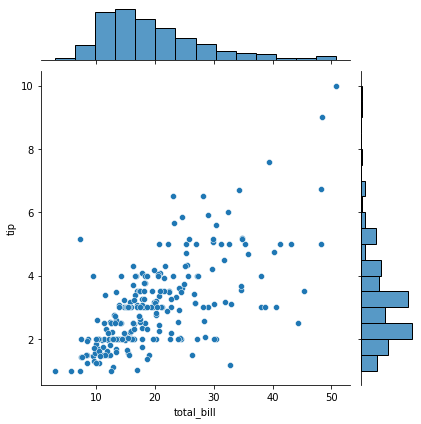

In [5]:
sns.jointplot(x="total_bill", y="tip", data=tips)

### 在联合添加回归和核密度拟合

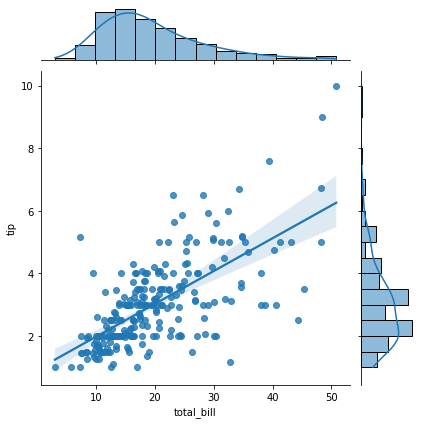

In [6]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg")

### 使用六边形点代替联合直方图中的圆形散点

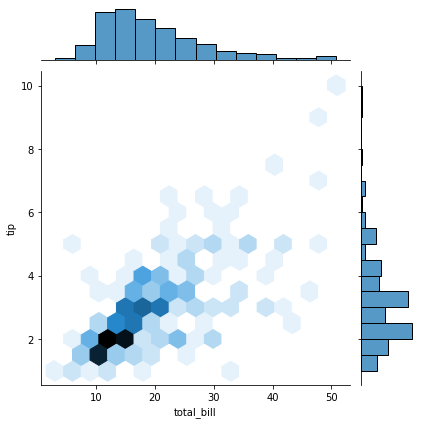

In [7]:
sns.jointplot("total_bill", "tip", data=tips, kind="hex")

### 将散点图和直方图均替换为核密度估计

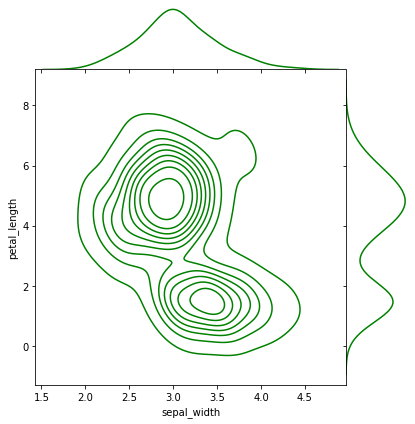

In [9]:
sns.jointplot("sepal_width", "petal_length", data=iris,
              kind="kde", space=0, color="g")

## 变量关系组图：pairplot()

### 为联合关系绘制散点图，为单变量绘制直方图

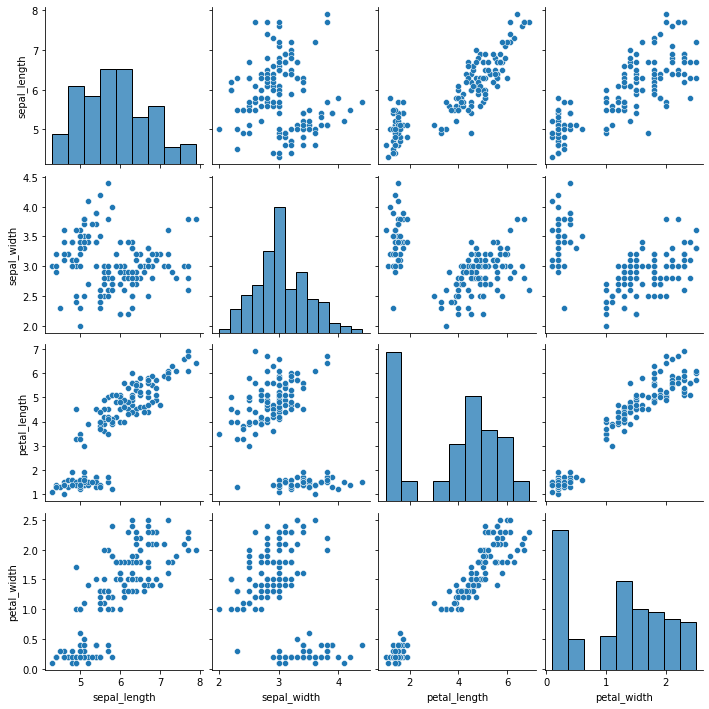

In [10]:
sns.pairplot(iris)

#由于值为数字的字段变量有4个，故绘制的关系图为4x4

### 为联合关系绘制散点图，为单变量绘制核密度估计图

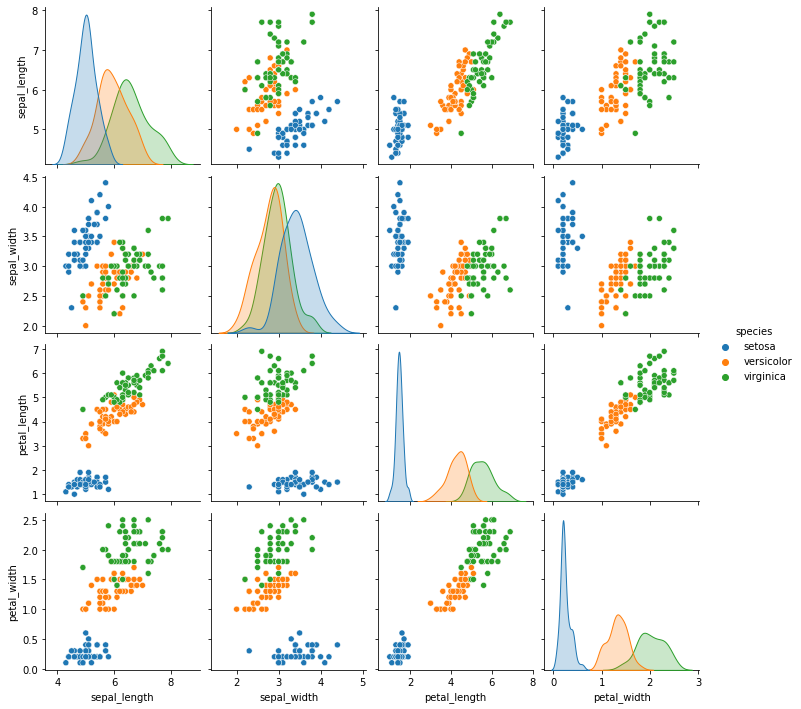

In [11]:
sns.pairplot(iris, hue="species")

### 指定markers来设置散点图中的点形

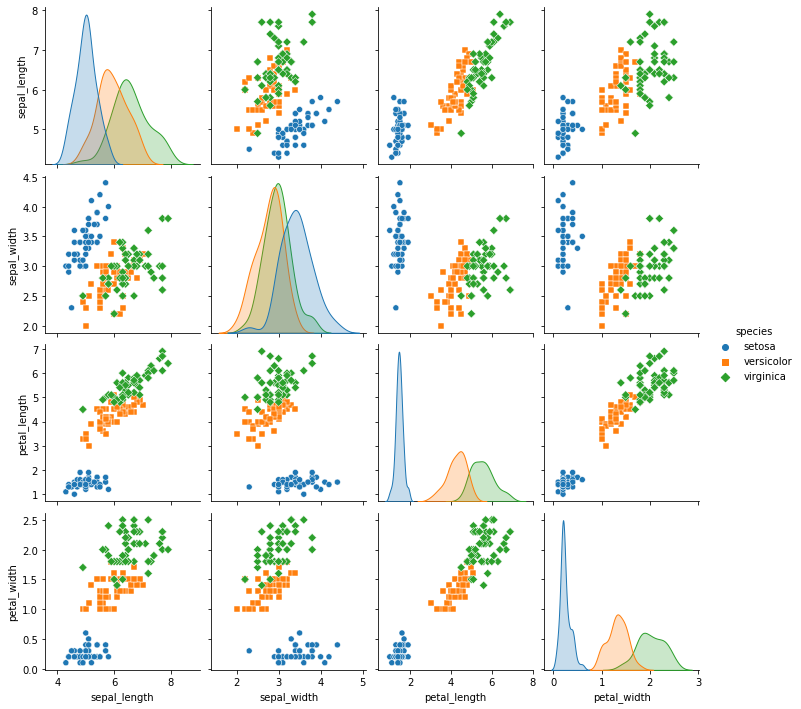

In [12]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

### 指定vars=["sepal_width", "sepal_length"]显式展示指定变量名对应的数据

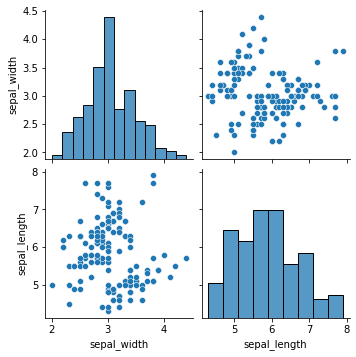

In [13]:
sns.pairplot(iris,vars=["sepal_width", "sepal_length"])

### 通过设置diag_kind指定绘制图类型(kde核密度估计图)

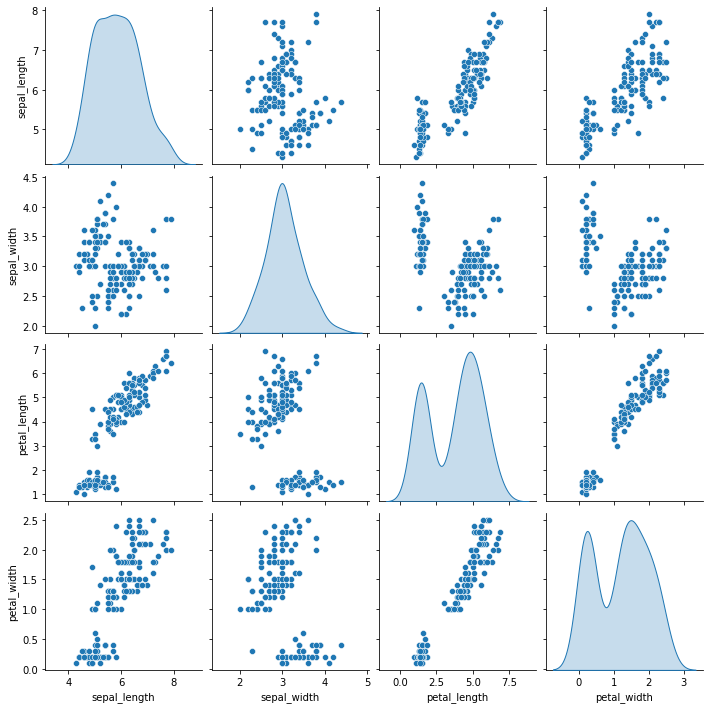

In [14]:
sns.pairplot(iris, diag_kind="kde")

### 设置kind=reg为散点图添加线性回归模型

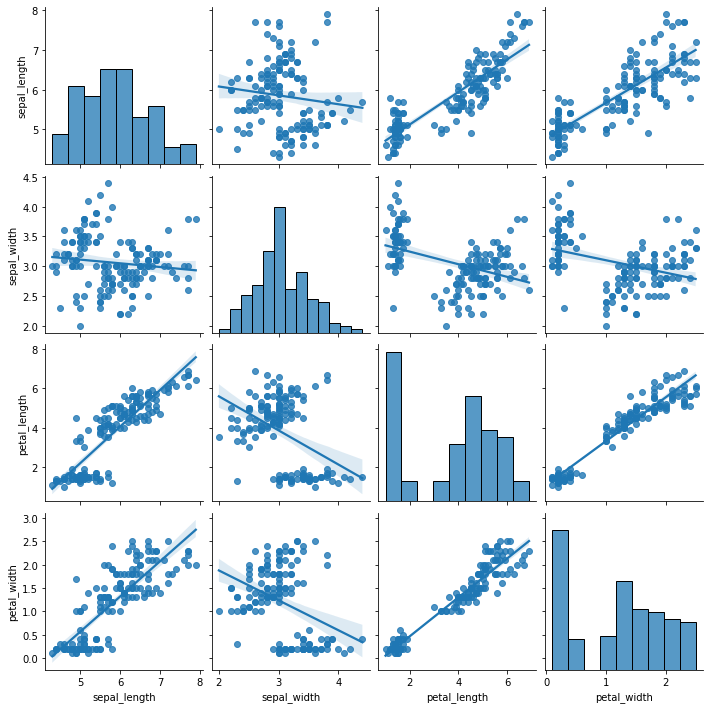

In [15]:
sns.pairplot(iris, kind="reg")

## 直方图：distplot()

- seaborn.distplot() 直方图，质量估计图，核密度估计图
- 该API可以绘制分别直方图和核密度估计图，也可以绘制直方图和核密度估计图的合成图 通过设置默认情况下，是绘制合成图，设置情况图下：
    - hist=True:表示要绘制直方图(默认情况为True)，若为False，则不绘制
    - kde=True:表示要绘制核密度估计图(默认情况为True),若为False,则绘制

### 绘制直方图

<AxesSubplot:ylabel='Density'>

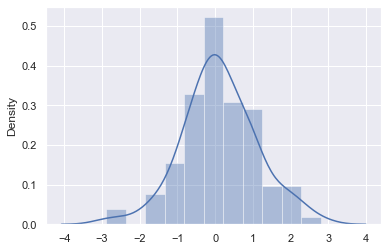

In [16]:
sns.set() # 设置默认灰色网格主题
x = np.random.normal(size=100) # 生成高斯数据100个
sns.distplot(x)

### 去掉直方图中的核密度曲线

<AxesSubplot:>

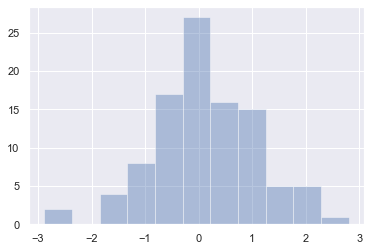

In [17]:
# 如果不想要核密度估计添加参数kde=False
sns.distplot(x, kde=False)

### 设置直方图组数为20

<AxesSubplot:>

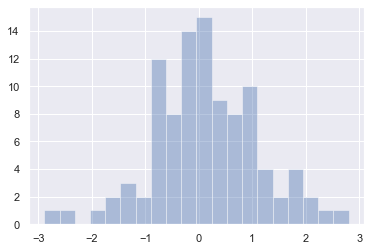

In [18]:
sns.distplot(x, bins=20, kde=False) # bins把数据切分成20份

## 核函数密度估计图：kdeplot()

- 该图主要用来拟合并绘制单变量或双变量核密度估计值。

### 绘制基本的单变量密度曲线图

<AxesSubplot:ylabel='Density'>

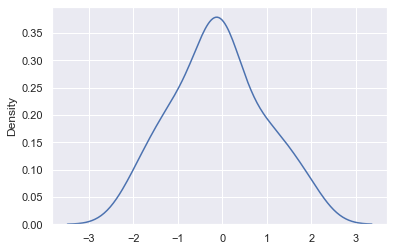

In [19]:
#构建数据
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T

sns.kdeplot(x)

### 绘制密度曲线，并在曲线下着色通过设置color来设置不同的显示颜色

<AxesSubplot:ylabel='Density'>

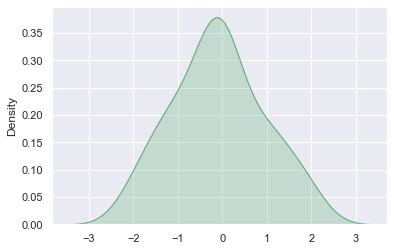

In [20]:
sns.kdeplot(x, shade=True, color="g")

### 绘制双变量密度曲线

<AxesSubplot:>

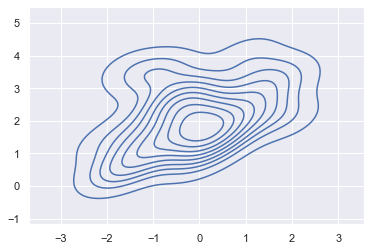

In [21]:
sns.kdeplot(x, y)

### 使用轮廓填充，并给轮廓添加颜色条

<AxesSubplot:>

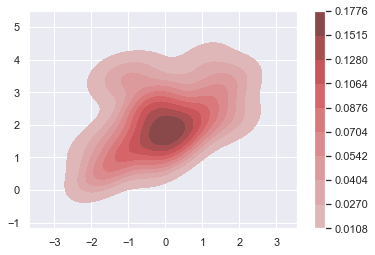

In [22]:
sns.kdeplot(x, y, shade=True, cbar=True, color='r')

## 绘制多个阴影双变量密度图(这里绘制两个)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

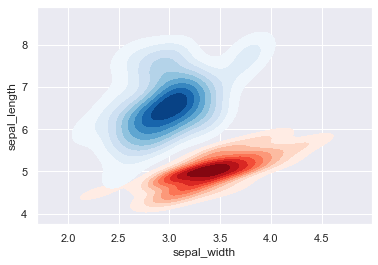

In [23]:
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]

sns.kdeplot(setosa.sepal_width, setosa.sepal_length, cmap="Reds", shade=True, shade_lowest=False)
sns.kdeplot(virginica.sepal_width, virginica.sepal_length, cmap="Blues", shade=True, shade_lowest=False)

## 回归模型图：implot()

- 回归模型图可以对数据进行回归显示。

### 绘制两变量之间的简单线性关系

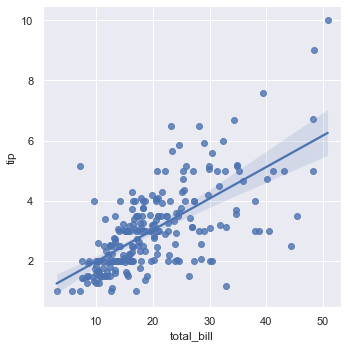

In [24]:
sns.lmplot(x="total_bill", y="tip", data=tips)

### 通过设置hue对数据进行第二次分组(通过对颜色进行区分)

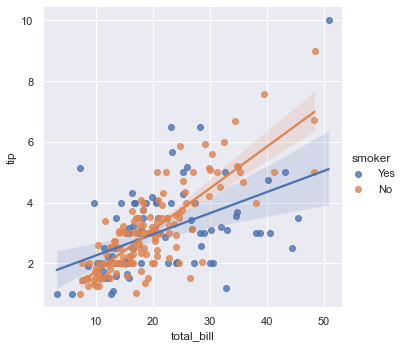

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

### 通过设置markers对数据点进行不同的标记

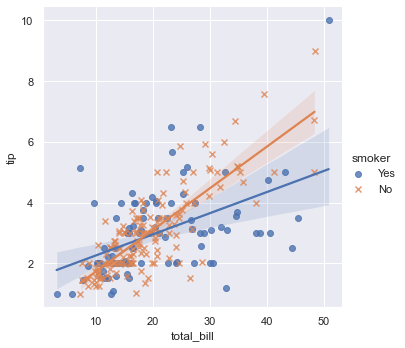

In [26]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
            data=tips,markers=["o", "x"])

### 通过设置col指定变量名，以该变量名的内容进行分类

- 每一个类别下的数据绘制一个图(即该变量名下有多少类值就绘制多少个图，并且排列在一行上)

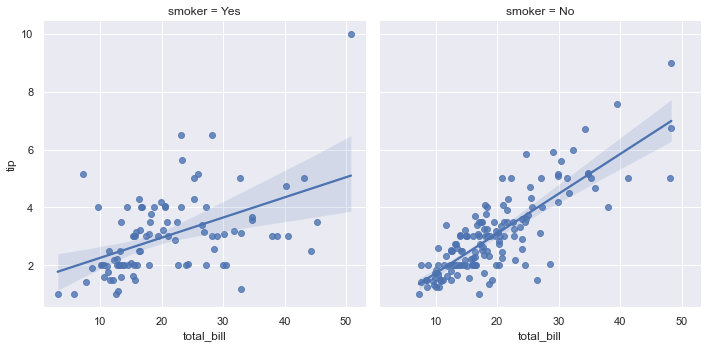

In [27]:
sns.lmplot(x="total_bill", y="tip", 
           col="smoker", data=tips)

## 线性回归图：regplot()

- 利用线性回归模型对数据进行拟合。

### 绘制双变量的线性关系

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

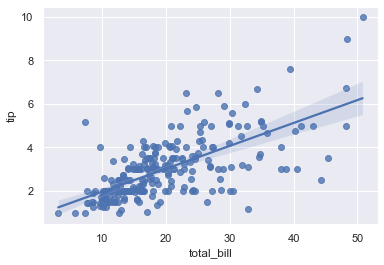

In [28]:
sns.regplot(x="total_bill", y="tip", data=tips)

### 设置ci=68:使用68%的置信区间，该区间对应于估计的标准误差

<AxesSubplot:>

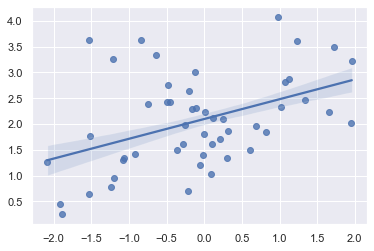

In [29]:
sns.regplot(x=x, y=y, ci=68)

### 拟合高阶多项式回归并阶段模型预测

<AxesSubplot:xlabel='x', ylabel='y'>

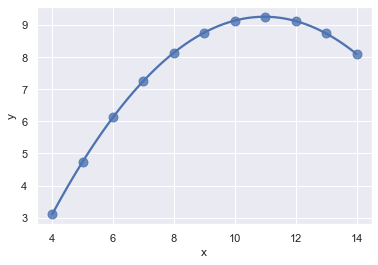

In [30]:
sns.regplot(x="x", y="y",
            data=ans.loc[ans.dataset == "II"],
            scatter_kws={"s": 80},
            order=2, ci=None, truncate=True)

### 拟合logistic 回归(logistic=True)，对y轴数据进行抖动(y_jitter=.03)，并进行适当的迭代(n_boot=500)

ModuleNotFoundError: No module named 'statsmodels'

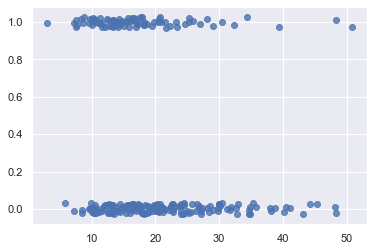

In [33]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .175

sns.regplot(x="total_bill", y="big_tip", 
            data=tips,logistic=True, 
            n_boot=500, y_jitter=.03)

## 热力图：heatmap()

- 将矩形数据绘制成颜色编码矩阵

### 对10x12的数据绘制热力图

<AxesSubplot:>

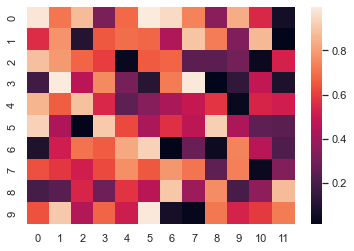

In [34]:
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data)

### 更改 colormap的限制：vmin=0, vmax=1

<AxesSubplot:>

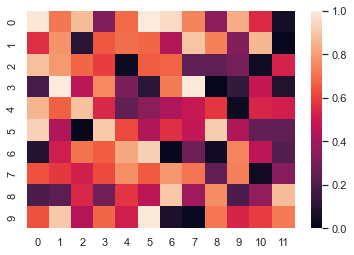

In [35]:
sns.heatmap(uniform_data, vmin=0, vmax=1)

### 直接对flights数据集中数据进行热力图显示

In [5]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [6]:
flights.pivot("month", "year", "passengers")

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

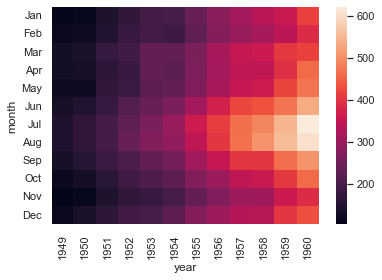

In [37]:
flights = flights.pivot("month", "year", "passengers")
sns.heatmap(flights)

### 对每个单元格进行数值显示

<AxesSubplot:xlabel='year', ylabel='month'>

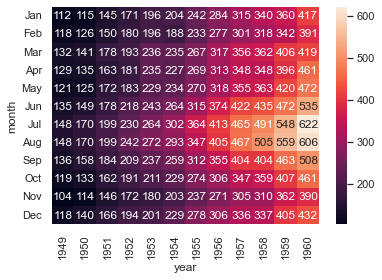

In [38]:
sns.heatmap(flights, annot=True, fmt="d")

### 绘制每个单元格的边框

<AxesSubplot:xlabel='year', ylabel='month'>

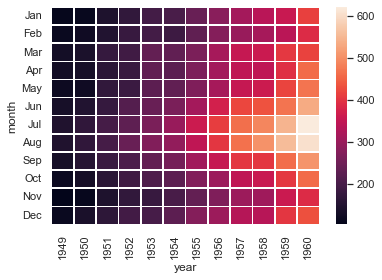

In [39]:
sns.heatmap(flights, linewidths=.5)

### 使用不同的colormap进行颜色显示

<AxesSubplot:xlabel='year', ylabel='month'>

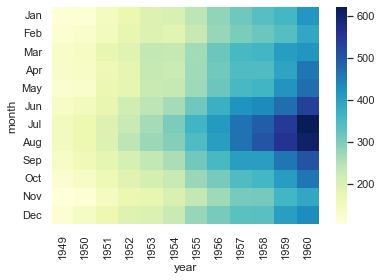

In [40]:
sns.heatmap(flights, cmap="YlGnBu")

## 小作业：

### 第一题：用countplot作图，绘制条形图
- 步骤:
    - 读取1965-2016年全球重大地震数据；
    - 设置Date类型为datetime类型，并添加年份和月份两列；
    - 筛选出type为地震的数据；
    - 用countplot()函数，绘制条形图，横轴为年份，纵轴为数量，看看每年到底有多少地震发生；

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取文件
df = pd.read_csv('data/earthquake.csv')


### 第二题：作热力图heatmap去看看近十年来的地震记录
- 步骤:
    - 按年份和月份列进行分组，取出年份、月份及ID列；
    - 删选出近十年的数据；
    - 将年份、月份及ID列做成数据透视表；
    - 将近十年来的地震记录数按照年份和月份做热力图
    - 设置一个标题：'近10年地震发生次数'